In [9]:
# Import essential libraries for data handling, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Load the diabetes dataset from CSV file
df = pd.read_csv("diabetes.csv")

# Display the first 5 rows to understand the structure
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# Check data types and non-null counts
print(df.info())

# Summary statistics for all numeric features
print(df.describe())

# Check class distribution of the target variable (Outcome)
print("Class Distribution:\n", df["Outcome"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [12]:
# Some features have 0s where they shouldn't (like Glucose or BMI)
# Replace 0s with NaN for specific columns
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Check number of missing values
print("Missing values before filling:\n", df.isnull().sum())

# Fill missing values with median of each column
df.fillna(df.median(), inplace=True)

Missing values before filling:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [13]:
# Separate features (X) and target label (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Scale the feature values to standard normal distribution (important for SVM, LR)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
# Train initial models
lr = LogisticRegression()
lr.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Create a dictionary with initial models
models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'SVM': svm
}

# Initialize and train additional classifiers
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Add the additional models to the models dictionary
models.update({
    'K-Nearest Neighbors': knn,
    'Naive Bayes': nb,
    'Decision Tree': dt,
    'Gradient Boosting': gb
})

In [21]:
# # Evaluate all models using accuracy, confusion matrix, and classification report
# models = {'Logistic Regression': lr, 'Random Forest': rf, 'SVM': svm}

# Loop through each model and print evaluation metrics
for name, model in models.items():
    print(f"\n=== {name} ===")
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


=== Logistic Regression ===
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[82 17]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154


=== Random Forest ===
Accuracy: 0.7402597402597403
Confusion Matrix:
 [[78 21]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154


=== SVM ===
Accuracy: 0.7467532467532467
Confusion Matrix:
 [[83 16]
 [23 32]]
Classification Report:
         

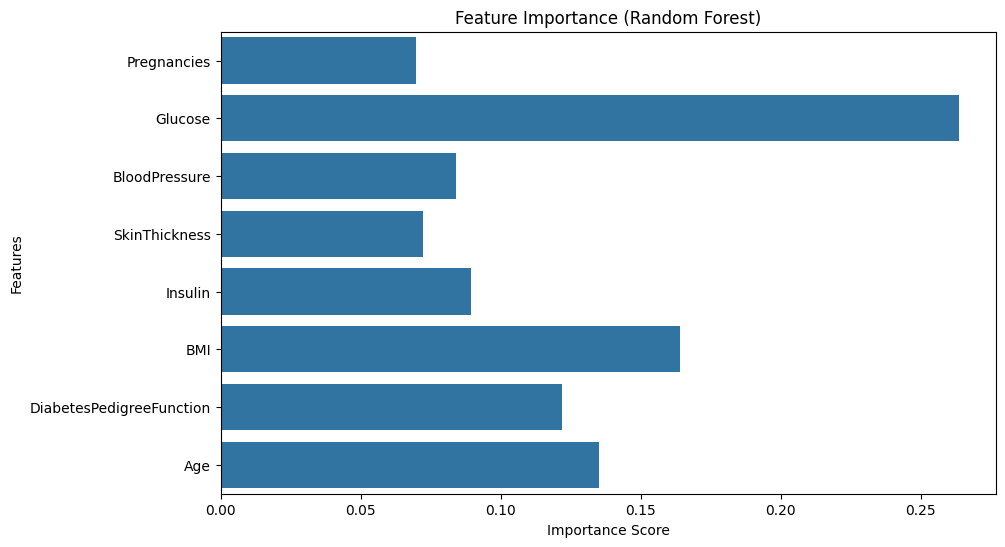

In [22]:
# Visualize which features were most important for prediction in Random Forest
importances = rf.feature_importances_
feature_names = df.columns[:-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()